# 1. Stepik ML contest - это еще что такое?

"Изучайте реальные данные и делайте реальные продукты" - сказал Сева, а Сева плохого не посоветует. Ровно этим мы и займемся. Думаю, это вам пригодится!

Практическим проектом нашего курса будет анализ активности студентов онлайн курса Введение в анализ данных в R, спасибо команде stepik, что предоставили анонимизированные данные.

В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах раскажу во втором модуле!

Описание данных:

### events_train.csv - данные о действиях, которые совершают студенты со стэпами

- step_id - id стэпа
- user_id - анонимизированный id юзера
- timestamp - время наступления события в формате unix date
- action - событие, возможные значения:
- discovered - пользователь перешел на стэп
- viewed - просмотр шага,
- started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
- passed - удачное решение практического шага

### submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

- step_id - id стэпа
- timestamp - время отправки решения в формате unix date
- submission_status - статус решения
- user_id - анонимизированный id юзера

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc = {'figure.figsize': (9, 6)})

In [3]:
events_data = pd.read_csv('event_data_train.zip', compression = 'zip')
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [4]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [5]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's') # Запишем дату и время в новый столбец в обычном формате

In [7]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [8]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [9]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

Работа с временем и датой - очень важный аспект в мире Data Science. Практически все базы данных используют timestamp для определения времени события, в машинном обучении есть целое направление - анализ временных рядов, для аналитики продукта очень важно понимать, как располагаются события во времени. 

Подготовил для вас несколько полезных статей:

[Работы с датой в Pandas](https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d) и еще [один вариант](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/)

[Работа с датой в Python при помощи модуля datetime](https://python-scripts.com/datetime-time-python)

In [10]:
events_data['day'] = events_data.date.dt.date # Запишем только дату (без времени) в отдельную колонку

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [12]:
events_data.groupby('day').user_id.nunique().head(10) # Посмотрим количество уникальных пользователей в разбивке по дням

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
2015-06-20    294
2015-06-21    292
2015-06-22    516
2015-06-23    520
2015-06-24    471
Name: user_id, dtype: int64

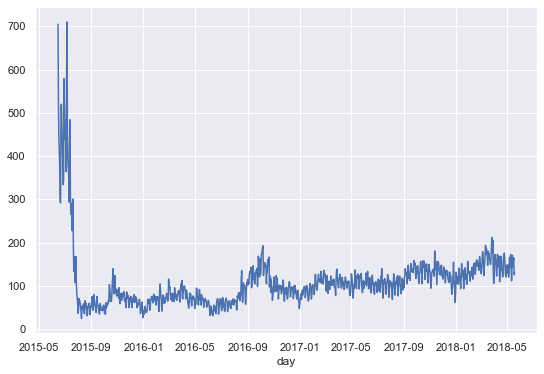

In [13]:
# Но в таблице такие данные изучать неудобно. поэтому построим простую визуализацию
events_data.groupby('day').user_id.nunique().plot()

Таким образом мы определяем количество пользователей, проявивших активность в конкретный день, а не число записавшихся пользователей. 

Правильнее будет для каждого пользователя определить минимальную дату, а затем для каждой даты посчитать количество уникальных пользователей (Только вместо расчета day.min() - нужно использовать date.min(), так как в течение дня пользователь мог заходить несколько раз и  одну пандас не сможет вернуть -вернет все с минимальной датой.)

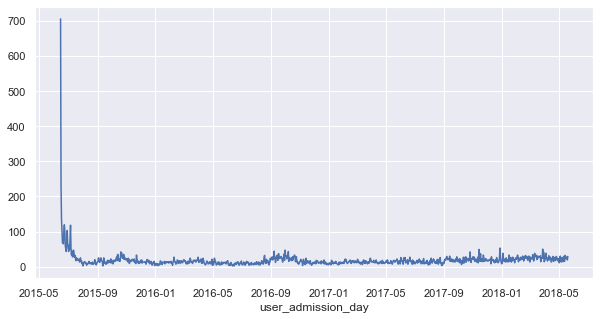

In [14]:
starting_date = events_data.groupby("user_id", as_index = False).date.min()
starting_date.rename(columns={'date':'user_admission_date'},inplace=True)
starting_date['user_admission_day']=starting_date.user_admission_date.dt.date

starting_date.groupby("user_admission_day").user_id.nunique().plot(figsize=(10,5))

Другой способ для получения количества новых пользователей, можно поступить так:

Проанализировав данные можем видеть что step_id первого степа 32815, а action первого входа на степ discovered

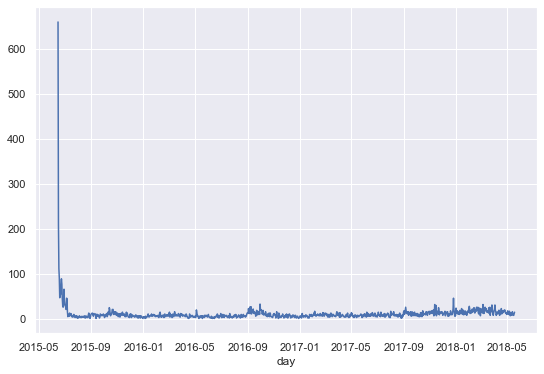

In [15]:
events_data[(events_data.step_id==32815) & (events_data.action=='discovered')] \
     .groupby('day').user_id.nunique().plot()

Теперь посмотрим, как распределены наши пользователи по количеству баллов которые были набраны за курс. 

Сначала будет не совсем верное решение, мы посмотрим какие ошибки допущены при анализе, потом сделаем верное решение

In [16]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id':'count'}) \
    .rename(columns={'step_id':'passed_steps'}) \
    .head(10)

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
5,9,3
6,14,3
7,16,196
8,17,5
9,18,2


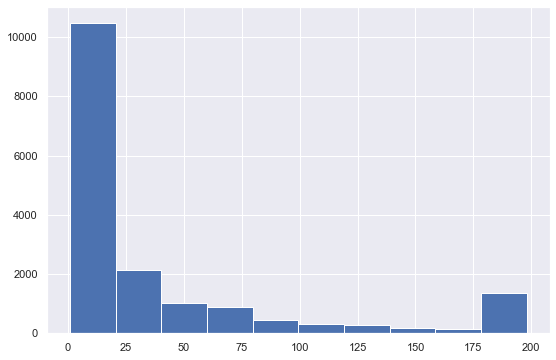

In [17]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id':'count'}) \
    .rename(columns={'step_id':'passed_steps'}) \
    .passed_steps.hist()

Что не так с нашими расчетами сумарного количества пройденных стэпов?


- [ ] Синтаксическая ошибка в коде, просто ничего не будет работать
- [ ] Потеряем данные о тех юзерах, у которых нет иных событий кроме как passed
- [x] Пользователи, у которых нет ни одного passed стэпа вообще не попадут в результат

Самое ужасное в данном подходе что наша модель не сломается, ошибок по технике не будет. Просто наша модель обучится на неверных данных.
Мы легко можем убедиться что наши данные не совсем верны. просто возьмем минимальное значение количества пройденных степов (passed_steps)

In [18]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id':'count'}) \
    .rename(columns={'step_id':'passed_steps'}) \
    .passed_steps.min()

1

Теперь сделаем правильный вариант, для этого мы используем сводную таблицу

In [19]:
events_data.pivot_table(index = 'user_id', # в результате каждая строчка будет информацией о каждом уникальном index
                        columns = 'action', #столбцы будут отвечать за уникальные значения columns 
                        values = 'step_id',  #в ячейках будет находиться информация по values
                        aggfunc = 'count', #сгруппированная по aggfunc
                        fill_value = 0).head(10) # пустые значения заменим на 0

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
8,109,84,37,156
9,3,3,0,4
11,1,0,1,1
14,4,3,1,9


У нас получилать таблица где для каждого пользователя посчитано количество степов. Как мы видим, у пользователя № 1 количество пройденных (passed) степов равно 0. Поэтому если делать анализ по первому варианту (через groupby) данный пользователь был бы удален.

Также у нас получились мультииндексы, можно избавиться от них с помощью команды reset_index

In [20]:
events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                        fill_value = 0).reset_index().head(10)

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
5,8,109,84,37,156
6,9,3,3,0,4
7,11,1,0,1,1
8,14,4,3,1,9
9,16,196,196,108,651


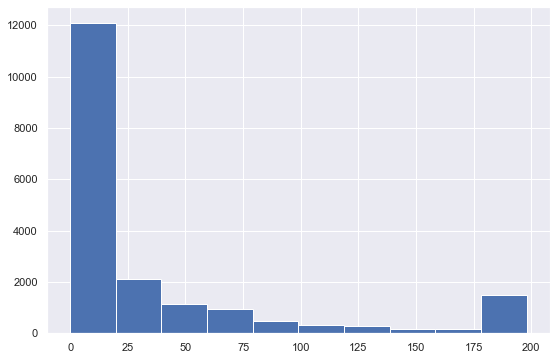

In [21]:
events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                        fill_value = 0).reset_index().discovered.hist()

# 2. Stepik ML contest - data preprocessing

Продолжаем предобрабатывать данные

В этом уроке познакомимся с merge и join в Pandas
А также рассмотрим продвинутый прием по работе с данными при помощи метода apply

```
Как закомментировать (#) сразу несколько строк в Jupiter Notebook?

выделить все строчки и нажать ctrl+/ на английской раскладке
```

In [22]:
submissions_data = pd.read_csv('submissions_data_train.zip', compression = 'zip')

In [23]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
5,31976,1434348188,correct,15853
6,31976,1478852055,correct,15853
7,31977,1434347371,correct,15853
8,31978,1434349981,correct,15853
9,31979,1434446091,correct,15853


In [24]:
submissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509104 entries, 0 to 509103
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   step_id            509104 non-null  int64 
 1   timestamp          509104 non-null  int64 
 2   submission_status  509104 non-null  object
 3   user_id            509104 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 15.5+ MB


In [25]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [26]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-16


In [27]:
users_scores = submissions_data.pivot_table(index = 'user_id',
                                            columns = 'submission_status',
                                            values = 'step_id',
                                            aggfunc = 'count',
                                            fill_value = 0).reset_index()
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


Теперь рассчитаем порог времени по достижении которого мы будем считать пользователя дропнувшимся (т.е. ушедшим навсегда)

In [28]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) # отберем нужные нам колонку и удалим повторяющиеся значения по колонкам 'user_id', 'day' 

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230
...,...,...,...
3480298,364,2018-05-19,1526762223
3480329,22851,2018-05-19,1526762629
3480333,943,2018-05-19,1526762664
3480669,26659,2018-05-19,1526770439


In [29]:
# Далее сгруппируем пользователей, и для каждого запишем в список его таймстемпы.
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.apply(list)


user_id
1                                             [1472827464]
2                                 [1514383364, 1519226966]
3        [1434358476, 1441257725, 1441440209, 144153391...
5                                 [1466156809, 1499859621]
7                                             [1521634660]
                               ...                        
26790     [1451484016, 1451722241, 1452616205, 1517495853]
26793                                         [1510225031]
26794    [1495287049, 1495373177, 1495509936, 149560483...
26797                             [1508425316, 1509993306]
26798                                         [1520975763]
Name: timestamp, Length: 19234, dtype: object

In [30]:
# Теперь посчитаем разницу между таймстемпами каждого пользователя
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.apply(list) \
    .apply(np.diff)


user_id
1                                                       []
2                                                [4843602]
3         [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                               [33702812]
7                                                       []
                               ...                        
26790                           [238225, 893964, 64879648]
26793                                                   []
26794    [86128, 136759, 94899, 1422583, 14347289, 5050...
26797                                            [1567990]
26798                                                   []
Name: timestamp, Length: 19234, dtype: object

In [31]:
# Сохраним значения в переменную gap_delta
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.apply(list) \
    .apply(np.diff).values
gap_data

# У нас получился массив из массивов для каждого пользователя

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [32]:
# Теперь объединим массивы внутри массива чтобы получился один массив и сделаем пандосовскую Серию
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [33]:
# Посчитаем разницу в днях
gap_data = gap_data / (24 * 60 * 60)
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

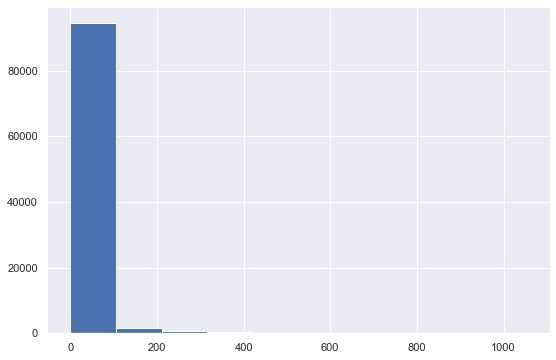

In [34]:
gap_data.hist()

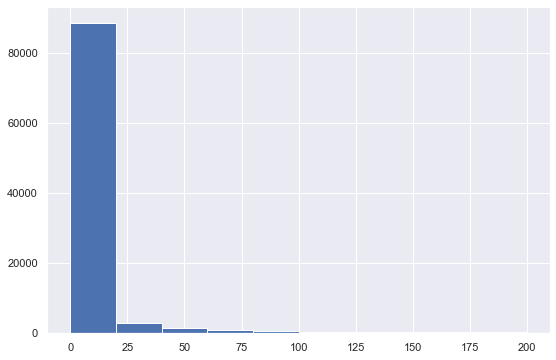

In [35]:
# Из-за больших выбросов график получился не очень содержательным (на првактике редко бывает приходится фильтровть данные), поэтому уберем аномально высокие значения. 
gap_data[gap_data < 200].hist()

Как видно из графика большая часть всех заходов укладывается в промежуток от 0 до 25 дней. Посчитваем эту цифру более точно:
Для этого возьмем 95 квантиль. 

In [36]:
# Получется что только 5% пользователей возвращаются на курс после перерыва в два месяца
gap_data.quantile(0.95)

59.760440972222156

In [37]:
# Если взять менее строгую оценку, то получается что 90% пользователей возвращаются в течении 18 дней
gap_data.quantile(0.90)

18.325995370370403

Как я уже писал ранее, данные, с которыми мы работаем, обезличены, тоесть реальные id пользователей заменены случайным числом. Анонимизация пользовательских данных - очень важная тема для Data Science. С одной стороны мы хотим знать о поведении наших пользователей как можно больше, с другой стороны нам важно соблюдать приватность наших пользователей.

Поэтому данные о поведении пользователей анонимизируют не только когда речь идет об открытых данных, но и при работе с данными внутри компании. Не заметили сколько писем вам недавно пришло об изменении политики конфеденциальности, хотите узнать почему? В комментарии приложена ссылка на очень интересный доклад об этой проблеме.

А пока что вот вам хакерская задача, за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого мы анализируем?

Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [38]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   step_id    int64         
 1   timestamp  int64         
 2   action     object        
 3   user_id    int64         
 4   date       datetime64[ns]
 5   day        object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 159.3+ MB


Пасхалка номер 1

Раз вы нашли Анатолия Карпова, вы должны знать про него все:

stepik.org/course/53863

In [39]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.apply(list) \
    .apply(len).sort_values(ascending=False).head(1)

user_id
1046    478
Name: timestamp, dtype: int64

Разметим наших пользователей с учетом является ли пользователь покинувшим курс (мы ранее определили что если пользоватлеь не имеет сертификата и не заходил на курс более 30 дней то такой пользователь считается покинувшим курс) 

In [40]:
# Определим финальный (последний) день курса, в нашем случае это 19 мая. От него будем отсчитывать отвалившихся пользователей
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [41]:
# Рассчитаем для каждого пользователя его максимальный timestamp (его максимальное время появление на курсе)
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

Итак у нас есть максмальный timestamp для каждого пользоватлея и нам нужно проверить превышает ли он заведенное нами значение

In [42]:
# Пороговый timestamp равняется:
30 * 24 * 60 * 60

2592000

In [43]:
users_data['is_gone_user'] = 1526772811 - users_data.last_timestamp # Сколько времени прошло с момента последнего посещения пользователем курса по сравнению с последним днем

In [44]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         19234 non-null  int64
 1   last_timestamp  19234 non-null  int64
 2   is_gone_user    19234 non-null  int64
dtypes: int64(3)
memory usage: 601.1 KB


In [45]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 * 60

In [46]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold # Пользователи отсутсвующие более 30 дней, и к решению задач врят ли вернутся

In [47]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         19234 non-null  int64
 1   last_timestamp  19234 non-null  int64
 2   is_gone_user    19234 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 469.6 KB


In [48]:
users_data.merge(users_scores).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 9939
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         9940 non-null   int64
 1   last_timestamp  9940 non-null   int64
 2   is_gone_user    9940 non-null   bool 
 3   correct         9940 non-null   int64
 4   wrong           9940 non-null   int64
dtypes: bool(1), int64(4)
memory usage: 398.0 KB


In [49]:
users_data = users_data.merge(users_scores, how='left', on='user_id')

In [50]:
users_data = users_data.fillna(0)

In [51]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [52]:
users_events_data = events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                        fill_value = 0).reset_index()

In [53]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [54]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [55]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [56]:
# Добавим число уникальных дней для каждого пользователя
users_days = events_data.groupby('user_id').day.nunique()

In [57]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [58]:
# Перевод серии в датафрейм
users_days = users_days.to_frame().reset_index()

In [59]:
users_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  19234 non-null  int64
 1   day      19234 non-null  int64
dtypes: int64(2)
memory usage: 300.7 KB


In [60]:
users_data = users_data.merge(users_days, on='user_id', how='outer')

In [61]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
5,8,1481466913,True,9.0,21.0,109,84,37,156,2
6,9,1484999497,True,0.0,0.0,3,3,0,4,1
7,11,1526140625,False,0.0,0.0,1,0,1,1,1
8,14,1436368676,True,0.0,1.0,4,3,1,9,1
9,16,1513162585,True,77.0,106.0,196,196,108,651,21


In [62]:
# Проверяем не потерялись ли у нас значения. Для этого сравним количество уникальных пользователей до и после преобразований
users_data.user_id.nunique() == events_data.user_id.nunique()

True

И добавим последний признак в наш датафрейм. Определим прошел ли пользователь курс или нет. Для успешного завершения курса необходимо набрать 170 баллов или более

In [63]:
users_data['passed_course'] = users_data.passed > 170

In [64]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [65]:
group_table = users_data.groupby('passed_course').count().reset_index()
group_table

,passed_course,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
1,True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [66]:
group_table.iloc[1, 1]

1425

In [67]:
print(round((group_table.iloc[1, 1]/group_table.iloc[0, 1] * 100), 2))

8.0


Таким образом только 8% пользователей прошли курс.